### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [107]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [7]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [8]:
data[data['Bar'].isna() == True]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,1,Some college - no degree,Management,$62500 - $74999,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,1,Some college - no degree,Management,$62500 - $74999,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,1,Some college - no degree,Management,$62500 - $74999,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,1,1
520,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,50plus,Divorced,1,Some college - no degree,Management,$62500 - $74999,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,1,Some college - no degree,Management,$62500 - $74999,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12168,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,31,Single,0,Associates degree,Arts Design Entertainment Sports & Media,$75000 - $87499,NaN,NaN,less1,gt8,1~3,less1,1,0,0,1,0,0
12169,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,31,Single,0,Associates degree,Arts Design Entertainment Sports & Media,$75000 - $87499,NaN,NaN,less1,gt8,1~3,less1,1,0,0,0,1,0
12170,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,31,Single,0,Associates degree,Arts Design Entertainment Sports & Media,$75000 - $87499,NaN,NaN,less1,gt8,1~3,less1,1,0,0,1,0,1
12171,Work,Alone,Snowy,30,7AM,Bar,1d,Female,31,Single,0,Associates degree,Arts Design Entertainment Sports & Media,$75000 - $87499,NaN,NaN,less1,gt8,1~3,less1,1,1,1,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
# Drop 'car' column - 90+% NaN
data_removed_car = data.drop(columns=['car'])
# Drop all other rows with any NaNs - ~1% of available data
data_filtered = data_removed_car.dropna()
data_filtered = data_filtered.reset_index()
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 12079 non-null  int64 
 1   destination           12079 non-null  object
 2   passanger             12079 non-null  object
 3   weather               12079 non-null  object
 4   temperature           12079 non-null  int64 
 5   time                  12079 non-null  object
 6   coupon                12079 non-null  object
 7   expiration            12079 non-null  object
 8   gender                12079 non-null  object
 9   age                   12079 non-null  object
 10  maritalStatus         12079 non-null  object
 11  has_children          12079 non-null  int64 
 12  education             12079 non-null  object
 13  occupation            12079 non-null  object
 14  income                12079 non-null  object
 15  Bar                   12079 non-null

4. What proportion of the total observations chose to accept the coupon? 



In [10]:
data_filtered['Y'].value_counts()

Y
1    6877
0    5202
Name: count, dtype: int64

In [50]:
(6877 / 12079) * 100
# 57% accepted the coupon

56.93352098683666

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Types of Coupons Offered')

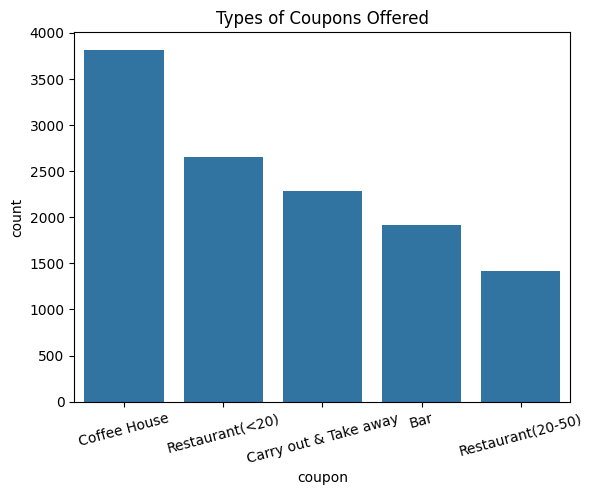

In [88]:
value_counts = data_filtered['coupon'].value_counts().reset_index()
sns.barplot(x='coupon', y='count', data=value_counts)
plt.xticks(rotation=15)
plt.title("Types of Coupons Offered")


6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temperature when coupon offered')

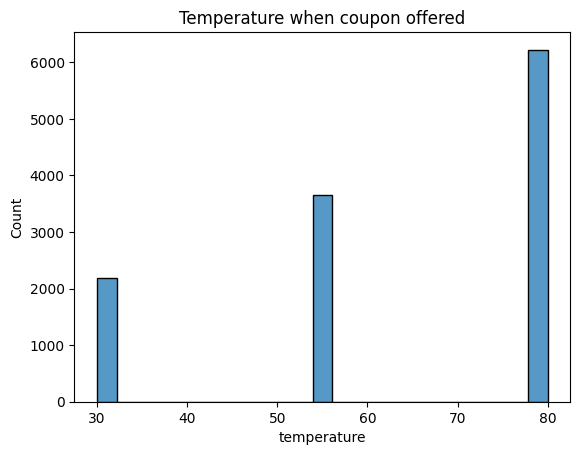

In [89]:
sns.histplot(data_filtered['temperature'])
plt.title('Temperature when coupon offered')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [72]:
data_bar = data_filtered[data_filtered['coupon'] == 'Bar']
data_bar

,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2,24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,...,less1,4~8,4~8,less1,1,0,0,0,1,1
13,35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,...,less1,4~8,4~8,less1,1,0,0,1,0,1
17,39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,...,less1,4~8,4~8,less1,1,1,1,0,1,1
24,46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,...,4~8,1~3,1~3,never,1,0,0,0,1,0
35,57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12058,12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12059,12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12062,12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12065,12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [135]:
(data_bar[data_bar['Y'] == 1].count()[0] / data_bar.count()[0]) * 100 #number of responses where Y = 1 divided by number of total responses times 100 = 41%

41.19184526921067

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [108]:
data_bar['Bar'].value_counts()

Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

In [152]:
three_or_fewer_bar_visits = data_bar[data_bar['Bar'].isin(['never', 'less1', '1~3'])] # 1720 rows
four_or_more_bar_visits = data_bar[data_bar['Bar'].isin(['4~8', 'gt8'])] #193 rows

# Acceptance rates
three_under_acceptance = (three_or_fewer_bar_visits[three_or_fewer_bar_visits['Y'] == 1].count()[0] / three_or_fewer_bar_visits.count()[0]) * 100
four_over_acceptance = (four_or_more_bar_visits[four_or_more_bar_visits['Y'] == 1].count()[0] / four_or_more_bar_visits.count()[0]) * 100
print('Acceptance rate for 3 visits and below: ', three_under_acceptance) 
print('Acceptance rate for 4 visits and above: ', four_over_acceptance)
#Acceptance rate for higher bar visits is almost double


Acceptance rate for 3 visits and below:  37.26744186046512
Acceptance rate for 4 visits and above:  76.16580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [157]:
bar_regular = data_bar[data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])]
bar_regular_and_over_25 = bar_regular[bar_regular['age'] > '25']
# bar_regular_and_over_25.info()
bar_regular_and_over_25_acceptance = (bar_regular_and_over_25[bar_regular_and_over_25['Y'] == 1].count()[0] / bar_regular_and_over_25.count()[0]) * 100 # 68%

# Add a helper column to both DataFrames
data_bar['_helper'] = 1
bar_regular_and_over_25['_helper'] = 1

# Create a boolean mask to identify rows in df that are not in subset_df
mask = ~data_bar.set_index(['Bar', 'age']).index.isin(bar_regular_and_over_25.set_index(['Bar', 'age']).index)

# Apply the mask to filter the DataFrame
not_bar_regular = data_bar[mask]
not_bar_regular_acceptance = (not_bar_regular[not_bar_regular['Y'] == 1].count()[0] / not_bar_regular.count()[0]) * 100 # 34%

C:\Users\tpost\AppData\Local\Temp\ipykernel_46776\4090030211.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bar['_helper'] = 1
C:\Users\tpost\AppData\Local\Temp\ipykernel_46776\4090030211.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_regular_and_over_25['_helper'] = 1


The difference in acceptance rate between the groups is 34%

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [159]:
data_bar['occupation'].value_counts()

occupation
Unemployed                                   292
Student                                      237
Computer & Mathematical                      225
Sales & Related                              175
Education&Training&Library                   125
Management                                   108
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Architecture & Engineering                    27
Personal Care & Service                       25
Construction & Extraction                     24
Life Phys

In [171]:
bar_regular = data_bar[data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])]
bar_regular_and_nonchildpass = bar_regular[bar_regular['passanger'] != 'Kid(s)']
bar_regular_and_nonchildpass_and_notfarmfishforestry = bar_regular_and_nonchildpass[bar_regular_and_nonchildpass['occupation'] != 'Farming Fishing & Forestry']
# The rows with occupation as Farming Fishing & Forestry are already filtered out in the bar_regular pass

bar_regular_and_nonchildpass_and_notfarmfishforestry_acceptance = (bar_regular_and_nonchildpass_and_notfarmfishforestry[bar_regular_and_nonchildpass_and_notfarmfishforestry['Y'] == 1].count()[0] / bar_regular_and_nonchildpass_and_notfarmfishforestry.count()[0]) * 100 # 71%

# # Add a helper column to both DataFrames
data_bar['_helper'] = 1
bar_regular_and_nonchildpass_and_notfarmfishforestry['_helper'] = 1

# # Create a boolean mask to identify rows in df that are not in subset_df
mask = ~data_bar.set_index(['Bar', 'passanger']).index.isin(bar_regular_and_nonchildpass_and_notfarmfishforestry.set_index(['Bar', 'passanger']).index)

# # Apply the mask to filter the DataFrame
not_regular_and_nonchildpass_and_notfarmfishforestry = data_bar[mask]
not_regular_and_nonchildpass_and_notfarmfishforestry_acceptance = (not_regular_and_nonchildpass_and_notfarmfishforestry[not_regular_and_nonchildpass_and_notfarmfishforestry['Y'] == 1].count()[0] / not_regular_and_nonchildpass_and_notfarmfishforestry.count()[0]) * 100 # 30%
not_regular_and_nonchildpass_and_notfarmfishforestry_acceptance

C:\Users\tpost\AppData\Local\Temp\ipykernel_46776\946626336.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bar['_helper'] = 1


29.790310918293567

The difference between the categories is 41%

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [186]:
data_bar['maritalStatus'].value_counts()

maritalStatus
Married partner      833
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: count, dtype: int64

In [188]:
bar_regular = data_bar[data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])]

bar_regular_and_nonchildpass = bar_regular[bar_regular['passanger'] != 'Kid(s)']
bar_regular_and_nonchildpass_and_notwidowed = bar_regular_and_nonchildpass[bar_regular_and_nonchildpass['maritalStatus'] != 'Widowed']

bar_regular_and_under30 = bar_regular[bar_regular['age'] < '30']

frequents_cheap_restaurants = data_bar[data_bar['RestaurantLessThan20'].isin(['4~8', 'gt8'])]
frequents_cheap_restaurants_and_income_under50k = frequents_cheap_restaurants[frequents_cheap_restaurants['income'].isin(['25000 - $37499', '$12500 - $24999', '$37500 - $49999', 'Less than $12500'])]

In [195]:
bar_regular_and_nonchildpass_and_notwidowed_acceptance = (bar_regular_and_nonchildpass_and_notwidowed[bar_regular_and_nonchildpass_and_notwidowed['Y'] == 1].count()[0] / bar_regular_and_nonchildpass_and_notwidowed.count()[0]) * 100 # 71%
bar_regular_and_under30_acceptance = (bar_regular_and_under30[bar_regular_and_under30['Y'] == 1].count()[0] / bar_regular_and_under30.count()[0]) * 100 # 73%
frequents_cheap_restaurants_and_income_under50k_acceptance = (frequents_cheap_restaurants_and_income_under50k[frequents_cheap_restaurants_and_income_under50k['Y'] == 1].count()[0] / frequents_cheap_restaurants_and_income_under50k.count()[0]) * 100 # 46%

print(bar_regular_and_nonchildpass_and_notwidowed_acceptance, 'percent go to bars more than once a month, had passengers that were not a kid, and were not widowed: ')
print(bar_regular_and_under30_acceptance, 'percent go to bars more than once a month and are under the age of 30: ')
print(frequents_cheap_restaurants_and_income_under50k_acceptance, 'percent go to cheap restaurants more than 4 times a month and income is less than 50K: ')


70.94339622641509 percent go to bars more than once a month, had passengers that were not a kid, and were not widowed: 
72.95597484276729 percent go to bars more than once a month and are under the age of 30: 
45.94594594594595 percent go to cheap restaurants more than 4 times a month and income is less than 50K: 


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

There is clearly a strong correlation between accepting a coupon for a bar and being a frequent visitor of bars. I hypothesize that many coupons are being sent to customers who were likely to patronize a bar at full price. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Create a new `DataFrame` that contains just the Coffee House coupons.


In [13]:
data_coffee = data_filtered[data_filtered['coupon'] == 'Coffee House']
data_coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3816 entries, 1 to 12076
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 3816 non-null   int64 
 1   destination           3816 non-null   object
 2   passanger             3816 non-null   object
 3   weather               3816 non-null   object
 4   temperature           3816 non-null   int64 
 5   time                  3816 non-null   object
 6   coupon                3816 non-null   object
 7   expiration            3816 non-null   object
 8   gender                3816 non-null   object
 9   age                   3816 non-null   object
 10  maritalStatus         3816 non-null   object
 11  has_children          3816 non-null   int64 
 12  education             3816 non-null   object
 13  occupation            3816 non-null   object
 14  income                3816 non-null   object
 15  Bar                   3816 non-null   obje

What proportion of coffee house coupons were accepted?

In [15]:
data_coffee['Y'].value_counts() #{0: 1922, 1: 1894}
(1894 / 3816) * 100 #Accepted / Total as a percentage ~50%

49.63312368972746

Compare the acceptance rate between those who went to a coffee house 3 or fewer times a month to those who went more.

In [23]:
frequent_coffee = data_coffee[data_coffee['CoffeeHouse'].isin(['4~8','gt8'])]

mask = ~data_coffee.set_index(['CoffeeHouse']).index.isin(frequent_coffee.set_index(['CoffeeHouse']).index)
infrequent_coffee = data_coffee[mask]

frequent_coffee['Y'].value_counts() #{0: 278, 1: 571}
infrequent_coffee['Y'].value_counts() #{0: 1644, 1: 1323}

print('Acceptance rate of customers who frequent Coffee Houses: ', (571/849) * 100)
print('Acceptance rate of customers who do not frequent Coffee Houses: ', (1323/2967) * 100)

#There is a ~22% difference in acceptance rate 

Acceptance rate of customers who frequent Coffee Houses:  67.25559481743227
Acceptance rate of customers who do not frequent Coffee Houses:  44.590495449949444


Compare the acceptance rate between drivers who go to a coffee house more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [135]:
data_coffee['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

C:\Users\tpost\AppData\Local\Temp\ipykernel_15264\938878042.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coffee['education'] = data_coffee['education'].str.replace('Graduate degree (Masters or Doctorate)', 'Graduate Degree')
C:\Users\tpost\AppData\Local\Temp\ipykernel_15264\938878042.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coffee['education'] = data_coffee['education'].str.replace('Some college - no degree', 'Some college')


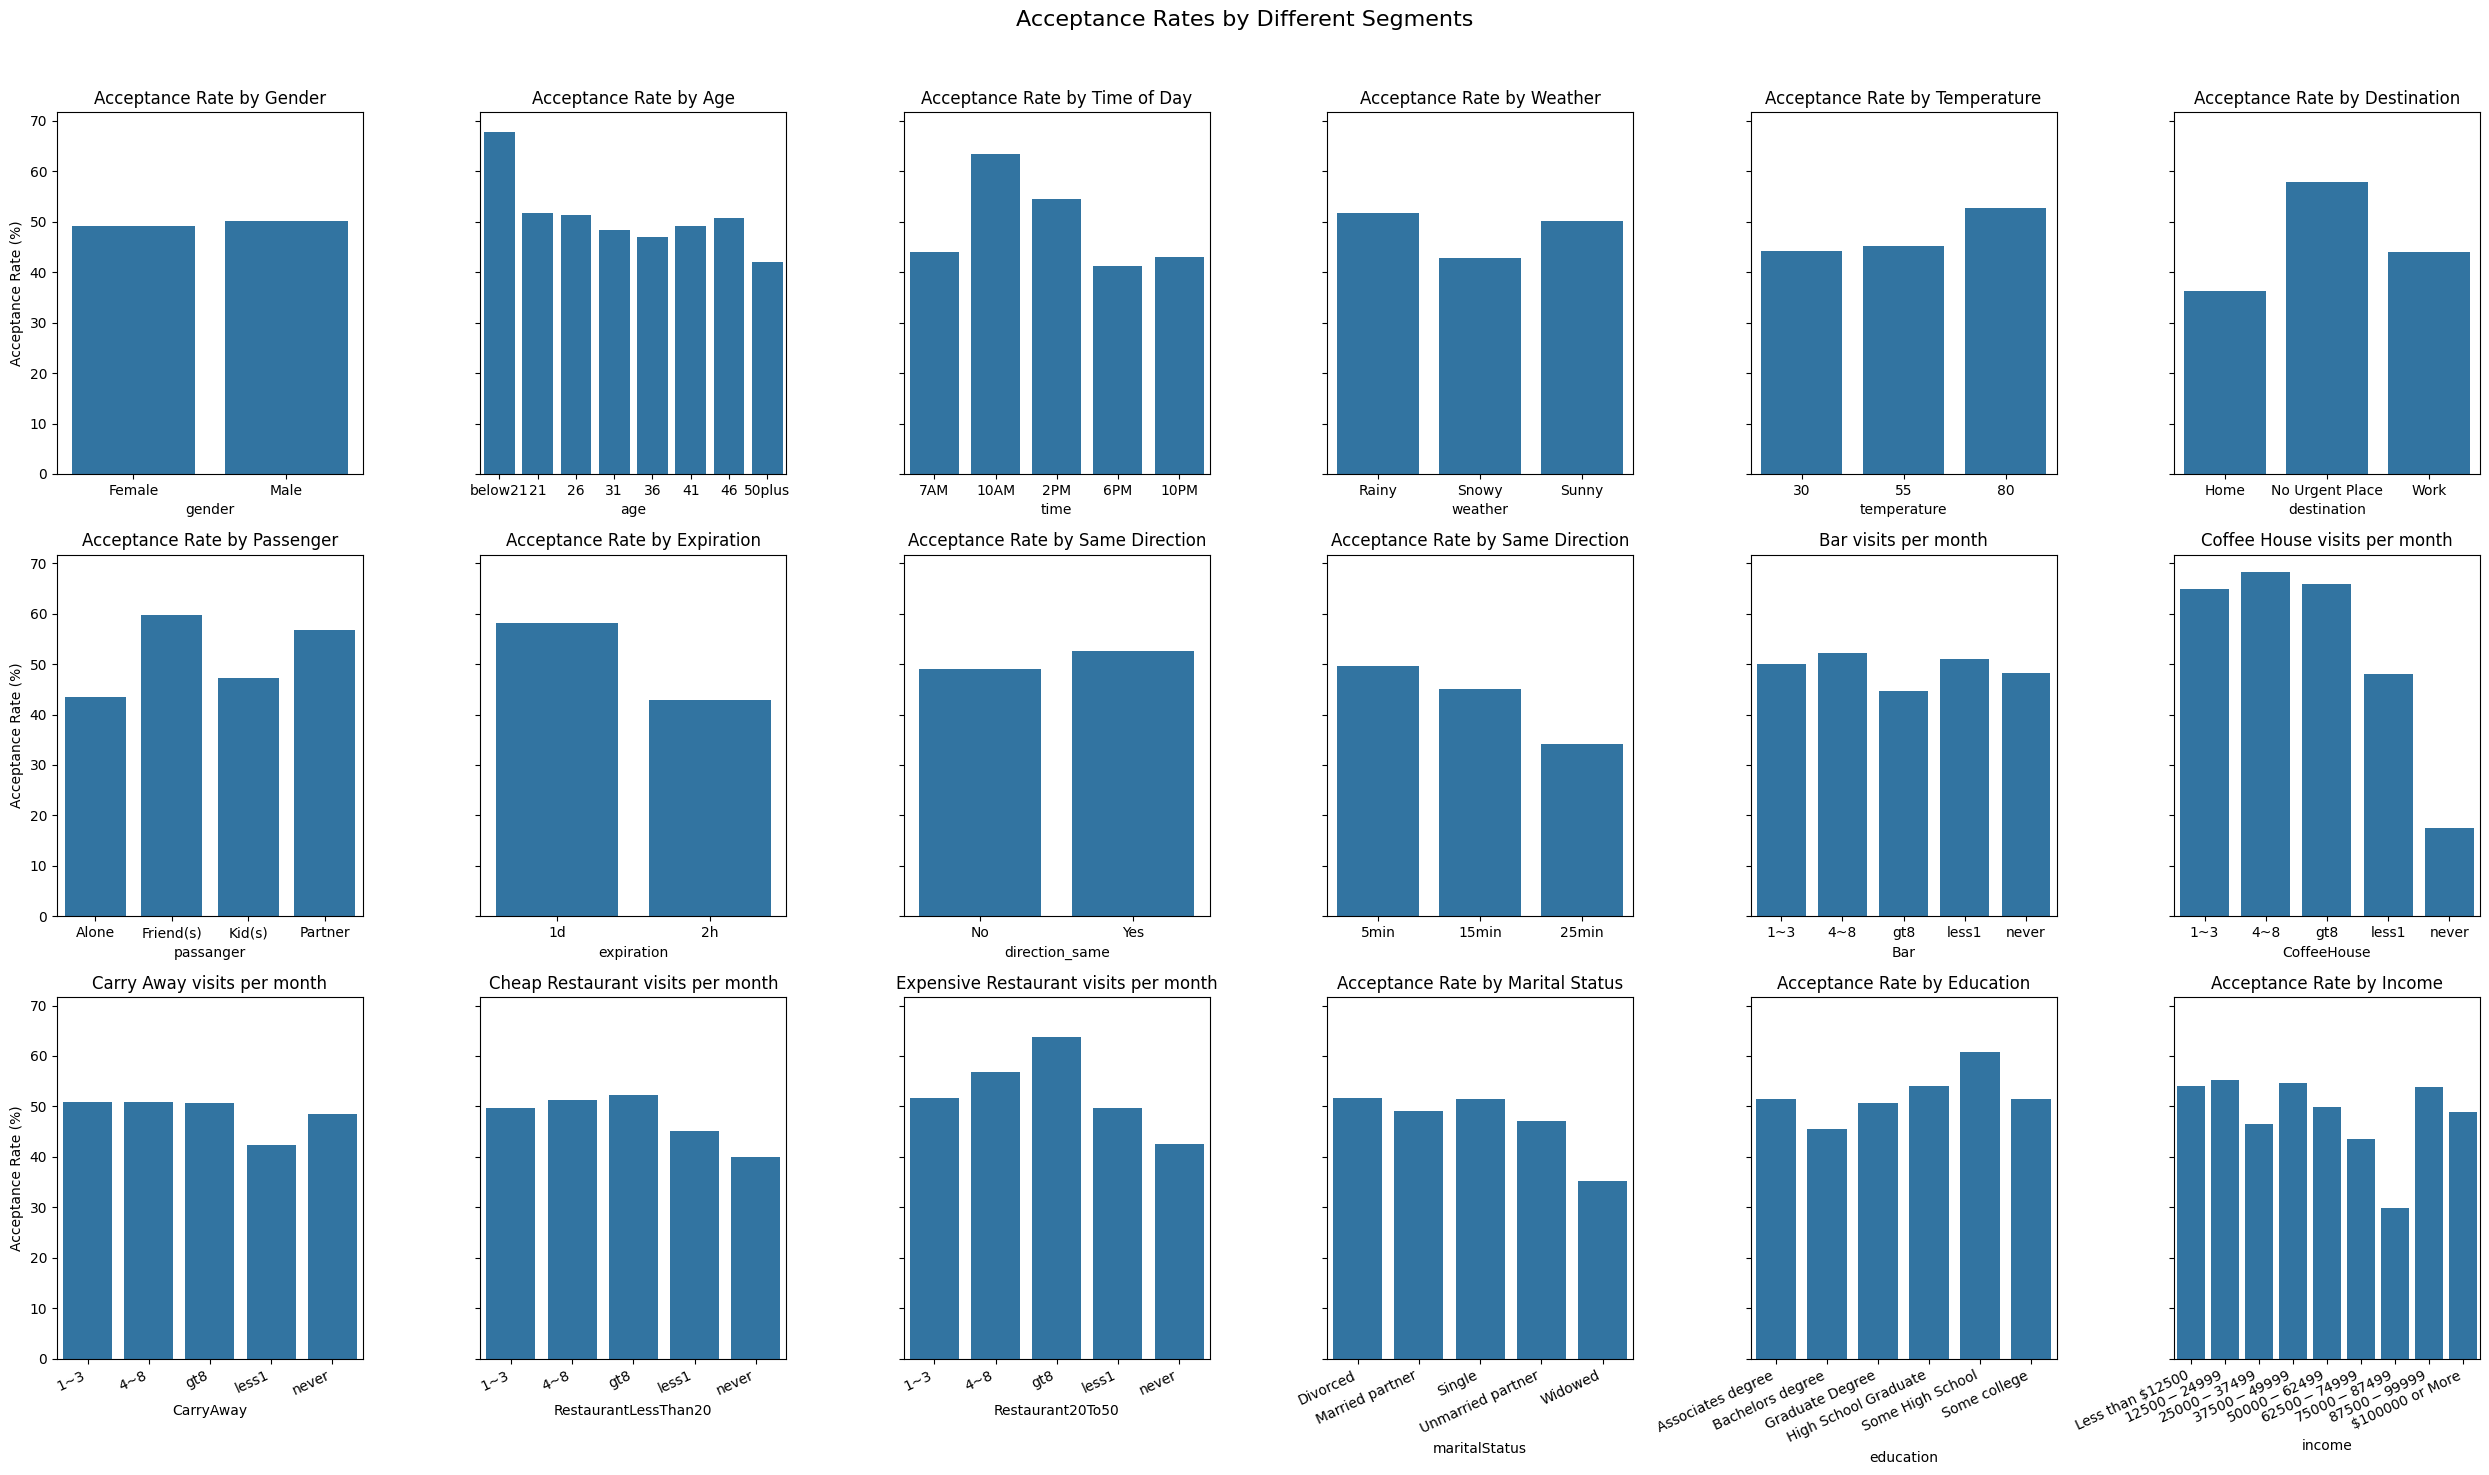

In [176]:
# Function to calculate acceptance rates
def calculate_acceptance_rate(df, column):
    return pd.DataFrame(df.groupby(column)['Y'].mean() * 100)

# Calculate acceptance rates
acceptance_gender = calculate_acceptance_rate(data_coffee, 'gender')
acceptance_age = calculate_acceptance_rate(data_coffee, 'age')
acceptance_marital = calculate_acceptance_rate(data_coffee, 'maritalStatus')
acceptance_time = calculate_acceptance_rate(data_coffee, 'time')
acceptance_weather = calculate_acceptance_rate(data_coffee, 'weather')
acceptance_temp = calculate_acceptance_rate(data_coffee, 'temperature')
acceptance_dest = calculate_acceptance_rate(data_coffee, 'destination')
acceptance_pass = calculate_acceptance_rate(data_coffee, 'passanger')
acceptance_expiration = calculate_acceptance_rate(data_coffee, 'expiration')
#Formatting adjustment
data_coffee['education'] = data_coffee['education'].str.replace('Graduate degree (Masters or Doctorate)', 'Graduate Degree')
data_coffee['education'] = data_coffee['education'].str.replace('Some college - no degree', 'Some college')
acceptance_ed = calculate_acceptance_rate(data_coffee, 'education')
acceptance_income = calculate_acceptance_rate(data_coffee, 'income')
acceptance_direction = calculate_acceptance_rate(data_coffee, 'direction_same')
acceptance_dist5 = calculate_acceptance_rate(data_coffee, 'toCoupon_GEQ5min') # 49.63%
acceptance_dist15 = calculate_acceptance_rate(data_coffee, 'toCoupon_GEQ15min') # 45.1%
acceptance_dist25 = calculate_acceptance_rate(data_coffee, 'toCoupon_GEQ25min') # 34.23%
acceptance_dist = pd.DataFrame([49.63, 45.1, 34.23])
# Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
acceptance_bar_freq = calculate_acceptance_rate(data_coffee, 'Bar')
acceptance_CoffeeHouse_freq = calculate_acceptance_rate(data_coffee, 'CoffeeHouse')
acceptance_CarryAway_freq = calculate_acceptance_rate(data_coffee, 'CarryAway')
acceptance_RestaurantLessThan20_freq = calculate_acceptance_rate(data_coffee, 'RestaurantLessThan20')
acceptance_Restaurant20To50_freq = calculate_acceptance_rate(data_coffee, 'Restaurant20To50')


# Create subplots
fig, axes = plt.subplots(3, 6, figsize=(25, 15), sharey=True)
fig.suptitle('Acceptance Rates by Different Segments', fontsize=16)

# Plot acceptance rates in subplots
sns.barplot(ax=axes[0, 0], x='gender', y='Y', data=acceptance_gender).set_title('Acceptance Rate by Gender')
sns.barplot(ax=axes[0, 1], x='age', y='Y', data=acceptance_age, order=['below21', '21', '26', '31', '36', '41', '46', '50plus']).set_title('Acceptance Rate by Age')
sns.barplot(ax=axes[0, 2], x='time', y='Y', data=acceptance_time, order=['7AM', '10AM', '2PM', '6PM', '10PM']).set_title('Acceptance Rate by Time of Day')
sns.barplot(ax=axes[0, 3], x='weather', y='Y', data=acceptance_weather).set_title('Acceptance Rate by Weather')
sns.barplot(ax=axes[0, 4], x='temperature', y='Y', data=acceptance_temp).set_title('Acceptance Rate by Temperature')
sns.barplot(ax=axes[0, 5], x='destination', y='Y', data=acceptance_dest).set_title('Acceptance Rate by Destination')
sns.barplot(ax=axes[1, 0], x='passanger', y='Y', data=acceptance_pass).set_title('Acceptance Rate by Passenger')
sns.barplot(ax=axes[1, 1], x='expiration', y='Y', data=acceptance_expiration).set_title('Acceptance Rate by Expiration')
sns.barplot(ax=axes[1, 2], x='direction_same', y='Y', data=acceptance_direction).set_title('Acceptance Rate by Same Direction')
sns.barplot(ax=axes[1, 3], x=['5min', '15min', '25min'], y=0, data=acceptance_dist).set_title('Acceptance Rate by Same Direction')
sns.barplot(ax=axes[1, 4], x='Bar', y='Y', data=acceptance_bar_freq).set_title('Bar visits per month')
sns.barplot(ax=axes[1, 5], x='CoffeeHouse', y='Y', data=acceptance_CoffeeHouse_freq).set_title('Coffee House visits per month')
sns.barplot(ax=axes[2, 0], x='CarryAway', y='Y', data=acceptance_CarryAway_freq).set_title('Carry Away visits per month')
sns.barplot(ax=axes[2, 1], x='RestaurantLessThan20', y='Y', data=acceptance_RestaurantLessThan20_freq).set_title('Cheap Restaurant visits per month')
sns.barplot(ax=axes[2, 2], x='Restaurant20To50', y='Y', data=acceptance_Restaurant20To50_freq).set_title('Expensive Restaurant visits per month')
sns.barplot(ax=axes[2, 3], x='maritalStatus', y='Y', data=acceptance_marital).set_title('Acceptance Rate by Marital Status')
sns.barplot(ax=axes[2, 4], x='education', y='Y', data=acceptance_ed).set_title('Acceptance Rate by Education')
sns.barplot(ax=axes[2, 5], x='income', y='Y', data=acceptance_income, order=['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499','$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']).set_title('Acceptance Rate by Income')


# Misc
axes[1, 2].set_xticklabels(['No', 'Yes'])

# Set y label for the first subplot
axes[0, 0].set_ylabel('Acceptance Rate (%)')
axes[1, 0].set_ylabel('Acceptance Rate (%)')
axes[2, 0].set_ylabel('Acceptance Rate (%)')



# Rotate x labels
# for ax in axes[0]:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
for ax in axes[2]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right')


# # Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Based on these observations, I would hypothesize that drivers who accepted these coupons most likely:
- Work in Healthcare Practitioners & Technical or Building & Gounds Cleaning & Maintenance roles
- Are below the age of 21
- Already visit Coffee Houses frequently
- Are driving around 10 AM
- Are not in the income range of $75k-$87.5k
- Are not far from the Coffee House

C:\Users\tpost\AppData\Local\Temp\ipykernel_15264\389511632.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)


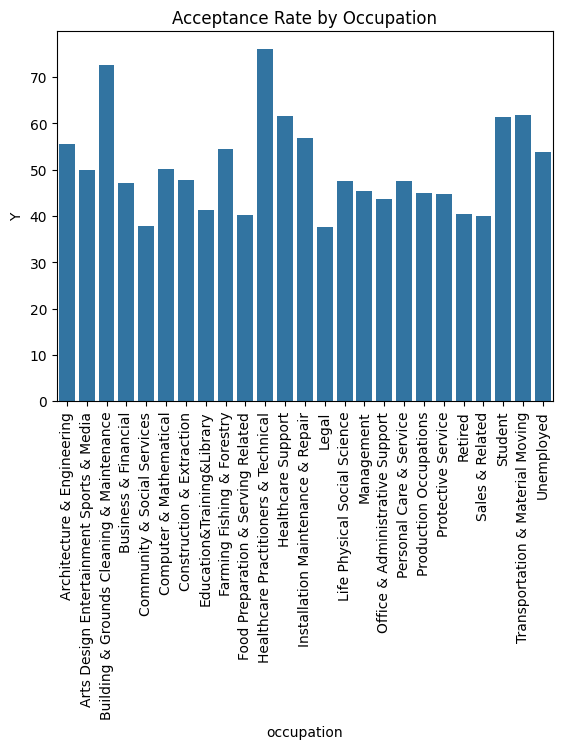

In [103]:
acceptance_occupation = calculate_acceptance_rate(data_coffee, 'occupation')

plot = sns.barplot(x='occupation', y='Y', data=acceptance_occupation)
plot.set_title('Acceptance Rate by Occupation')
plot.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
plt.show()

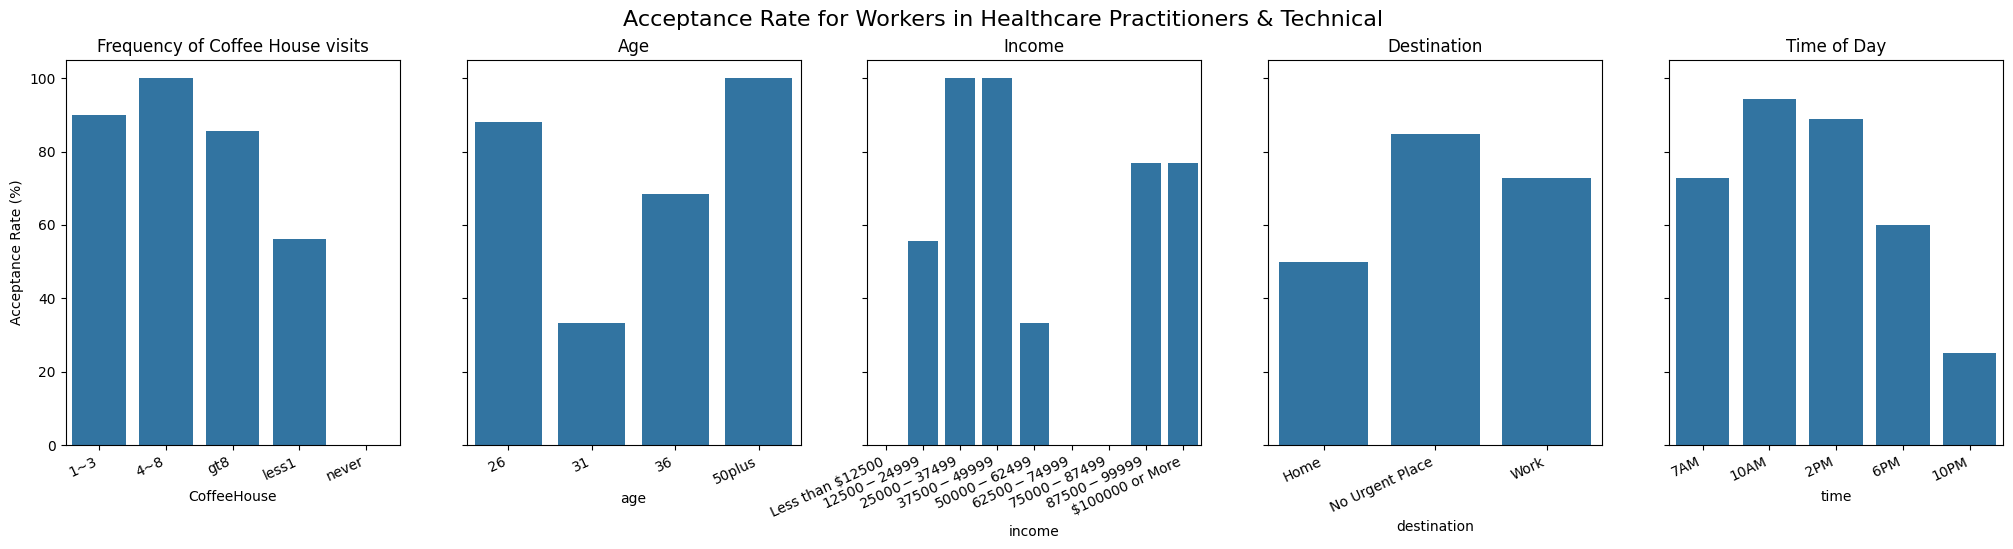

In [197]:
data_healthPT = data_coffee[data_coffee['occupation'] == 'Healthcare Practitioners & Technical']
acceptance_healthPT_CoffeeHouse_freq = calculate_acceptance_rate(data_healthPT, 'CoffeeHouse')
acceptance_healthPT_age = calculate_acceptance_rate(data_healthPT, 'age')
acceptance_healthPT_income = calculate_acceptance_rate(data_healthPT, 'income')
acceptance_healthPT_dest = calculate_acceptance_rate(data_healthPT, 'destination')
acceptance_healthPT_time = calculate_acceptance_rate(data_healthPT, 'time')


fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True)
fig.suptitle('Acceptance Rate for Workers in Healthcare Practitioners & Technical', fontsize=16)

sns.barplot(ax=axes[0], x='CoffeeHouse', y='Y', data=acceptance_healthPT_CoffeeHouse_freq).set_title('Frequency of Coffee House visits')
sns.barplot(ax=axes[1], x='age', y='Y', data=acceptance_healthPT_age).set_title('Age')
sns.barplot(ax=axes[2], x='income', y='Y', data=acceptance_healthPT_income, order=['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499','$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']).set_title('Income')
sns.barplot(ax=axes[3], x='destination', y='Y', data=acceptance_healthPT_dest).set_title('Destination')
sns.barplot(ax=axes[4], x='time', y='Y', data=acceptance_healthPT_time, order=['7AM', '10AM', '2PM', '6PM', '10PM']).set_title('Time of Day')


axes[0].set_ylabel('Acceptance Rate (%)')
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right')


Based on these narrower observations I would highlight offerning the coupons to those in the lower end of the income distribution early in the day. I would also investigate the acceptance rate across ages further and aim to leverage that for targeting younger vs older demographics. 